In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Defining constants and basis vectors

In [2]:
a_ = 10 # atom separation within unit cell
a = np.sqrt(3)*a_ # horizontal separation between hexagons/unit cells
v1 = np.array([1 , 0]) # first basis vector
v2 = np.array([1/2 , np.sqrt(3)/2]) # second basis vector

# Site production

In [3]:
def R_gr(a_,v1,v2,m,n):
    return np.sqrt(3)*a_*m*v1 + np.sqrt(3)*a_*n*v2   # Location vector of the graphene unit cells in 2D with m,n = 0,1,2,3...
# In each unit cell, we can define the location of atoms A and B relative to the centre of the unit cell +/- a_/2
def A_gr(a_,R):
    return np.array([R[0],R[1]+a_/2])
def B_gr(a_,R):
    return np.array([R[0],R[1]-a_/2])

In [4]:
mmax = 10 # "Columns"
nmax = 10 # "Rows"

def sites(a_,mmax,nmax,v1=v1,v2=v2):
    ms = np.arange(0,mmax); ns = np.arange(0,nmax)
    As=np.empty([mmax,nmax,2]); Bs=np.empty([mmax,nmax,2]); Rs=np.empty([mmax,nmax,2]) # Locations of A sites, B sites and unit cell centres
    for m in ms:
            for n in ns:
                R = R_gr(a_,v1,v2,m,n)
                Rs[m][n] = R
                As[m][n] = A_gr(a_,R)
                Bs[m][n] = B_gr(a_,R)
    return As,Bs,Rs,ms,ns

In [6]:
A_coords,B_coords,R_coords,ms,ns = sites(a_,mmax,nmax)

# Plotting

## Sites

In [7]:
def site_plotting(coords,colour,label):
    plt.scatter(coords[:,:,0], coords[:,:,1], s=20, c=colour, label=label, zorder=9) # Atoms at the front

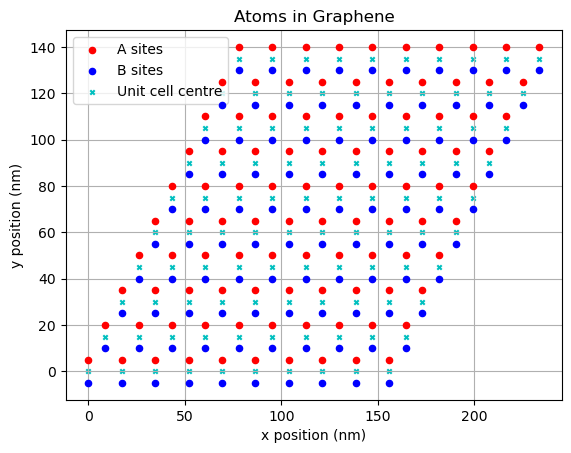

In [8]:
plt.figure()
site_plotting(A_coords,'r','A sites'); site_plotting(B_coords,'b','B sites')
plt.scatter(R_coords[:,:,0], R_coords[:,:,1], s=10, c= 'c', marker = 'x', label="Unit cell centre")
plt.xlabel("x position (nm)"); plt.ylabel("y position (nm)"); plt.title("Atoms in Graphene")
plt.legend();plt.grid()
plt.show()

## Bonds

### Diagonal 1

In [9]:
def diag1(As,Bs,ms,ns):
    for m in ms:
        for n in ns[:-1]: # Avoid last n because there is nowhere to connect to and we are not doing periodic boundary conditions
            plt.plot((As[m][n][0],Bs[m][n+1][0]),(As[m][n][1],Bs[m][n+1][1]), c = 'k')
# We connect between unit cells along the same m but different n

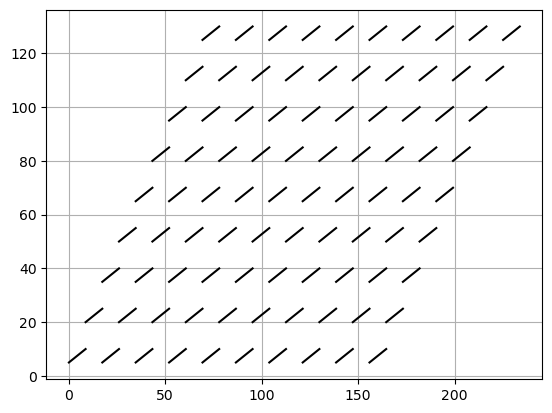

In [10]:
plt.figure()
diag1(A_coords,B_coords,ms,ns)
plt.grid()
plt.show()

### Diagonal 2

In [11]:
def diag2(As,Bs,ms,ns):
    for m in ms[:-1]:
        for n in ns[:-1]:
            plt.plot((Bs[m][n+1][0],As[m+1][n][0]),(Bs[m][n+1][1],As[m+1][n][1]), c = 'k')
# We connect between unit cells along the same n but different m

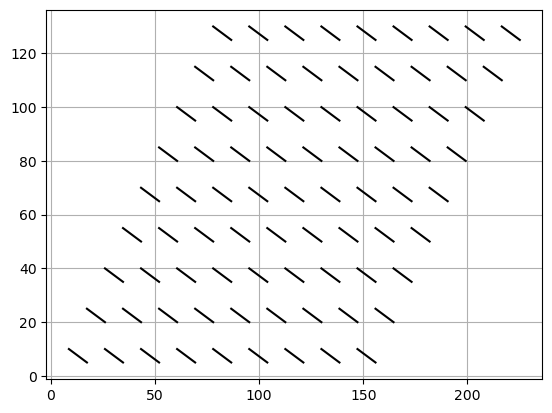

In [12]:
plt.figure()
diag2(A_coords,B_coords,ms,ns)
plt.grid()
plt.show()

### Vertical

In [13]:
def vert(As,Bs,ms,ns):
    for m in ms:
        for n in ns:
            plt.plot((Bs[m][n][0],As[m][n][0]),(Bs[m][n][1],As[m][n][1]), c = 'k') # All happens INSIDE unit cells

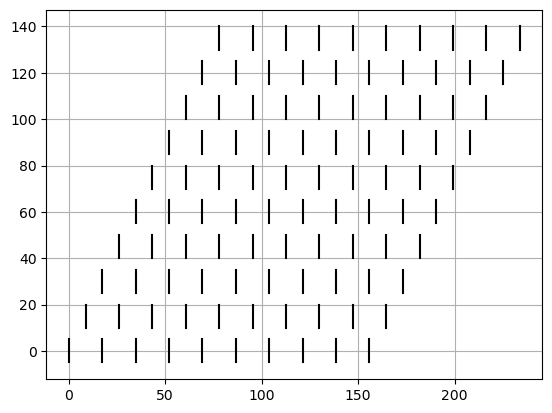

In [14]:
plt.figure()
vert(A_coords,B_coords,ms,ns)
plt.grid()
plt.show()

## Full plot

In [15]:
def full_plot(As,Bs,ms,ns):
    plt.figure()
    vert(As,Bs,ms,ns); diag1(As,Bs,ms,ns); diag2(As,Bs,ms,ns); site_plotting(As,'r','A sites'); site_plotting(Bs,'b','B sites')
    plt.xlabel("x position (nm)"); plt.ylabel("y position (nm)"); plt.title("Graphene")
    plt.legend()
    plt.grid()
    plt.show()

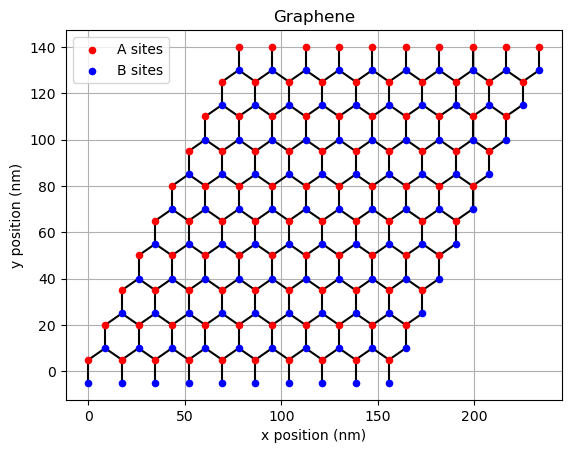

In [16]:
full_plot(A_coords,B_coords,ms,ns)

# The full function

In [17]:
def graph_graphene(a_,mmax,nmax):
    As,Bs,Rs,ms,ns = sites(a_,mmax,nmax)
    full_plot(As,Bs,ms,ns)

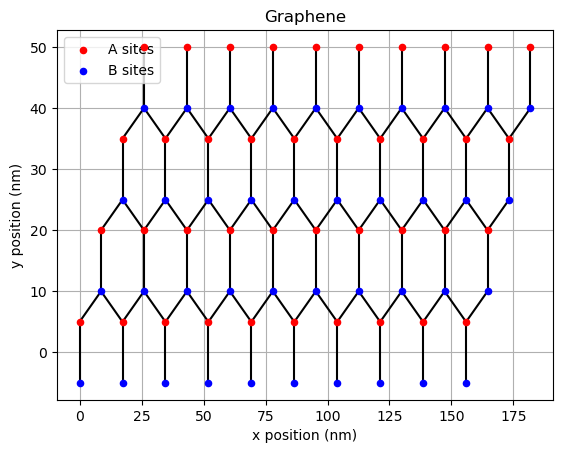

In [18]:
graph_graphene(10,10,4)

# Interactive

In [19]:
def intr(func):
    %matplotlib inline
    interactive_plot = interactive(func, a_ = (1,10,.1), mmax = (1,10,1), nmax = (1,10,1))
    output = interactive_plot.children[-1]
    output.layout.height = '500px'
    return interactive_plot

In [20]:
intr(graph_graphene)

interactive(children=(FloatSlider(value=5.0, description='a_', max=10.0, min=1.0), IntSlider(value=5, descript…

# All functions

In [21]:
def R_gr(a_,v1,v2,m,n):
    return np.sqrt(3)*a_*m*v1 + np.sqrt(3)*a_*n*v2 
    
def A_gr(a_,R):
    return np.array([R[0],R[1]+a_/2])
    
def B_gr(a_,R):
    return np.array([R[0],R[1]-a_/2])

def sites(a_,mmax,nmax,v1=v1,v2=v2):
    ms = np.arange(0,mmax); ns = np.arange(0,nmax)
    As=np.empty([mmax,nmax,2]); Bs=np.empty([mmax,nmax,2]); Rs=np.empty([mmax,nmax,2]) # Locations of A sites, B sites and unit cell centres
    for m in ms:
            for n in ns:
                R = R_gr(a_,v1,v2,m,n)
                Rs[m][n] = R
                As[m][n] = A_gr(a_,R)
                Bs[m][n] = B_gr(a_,R)
    return As,Bs,Rs,ms,ns

def site_plotting(coords,colour,label):
    plt.scatter(coords[:,:,0], coords[:,:,1], s=20, c=colour, label=label, zorder=9)

def diag1(As,Bs,ms,ns):
    for m in ms:
        for n in ns[:-1]:
            plt.plot((As[m][n][0],Bs[m][n+1][0]),(As[m][n][1],Bs[m][n+1][1]), c = 'k')

def diag2(As,Bs,ms,ns):
    for m in ms[:-1]:
        for n in ns[:-1]:
            plt.plot((Bs[m][n+1][0],As[m+1][n][0]),(Bs[m][n+1][1],As[m+1][n][1]), c = 'k')

def vert(As,Bs,ms,ns):
    for m in ms:
        for n in ns:
            plt.plot((Bs[m][n][0],As[m][n][0]),(Bs[m][n][1],As[m][n][1]), c = 'k')

def full_plot(As,Bs,ms,ns):
    plt.figure()
    vert(As,Bs,ms,ns); diag1(As,Bs,ms,ns); diag2(As,Bs,ms,ns); site_plotting(As,'r','A sites'); site_plotting(Bs,'b','B sites')
    plt.xlabel("x position (nm)"); plt.ylabel("y position (nm)"); plt.title("Graphene")
    plt.legend()
    plt.grid()
    plt.show()

def graph_graphene(a_,mmax,nmax):
    As,Bs,Rs,ms,ns = sites(a_,mmax,nmax)
    full_plot(As,Bs,ms,ns)

def intr(func):
    %matplotlib inline
    interactive_plot = interactive(func, manual=True, a_ = (1,10,.1), mmax = (1,10,1), nmax = (1,10,1))
    output = interactive_plot.children[-1]
    output.layout.height = '500px'
    return interactive_plot